<a href="https://colab.research.google.com/github/DEV-Cartisa/Data-Analysis-/blob/main/Sentiment_Analysis_Amzon_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


plt.style.use('dark_background')


In [37]:
import nltk
nltk.download("popular")

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

In [18]:
df = pd.read_csv('/content/Reviews.csv', error_bad_lines=False)

<ipython-input-18-8127f7d9ce10>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('/content/Reviews.csv', error_bad_lines=False)
Skipping line 13468: expected 10 fields, saw 16
Skipping line 17628: expected 10 fields, saw 13
Skipping line 19458: expected 10 fields, saw 15
Skipping line 21499: expected 10 fields, saw 11
Skipping line 27411: expected 10 fields, saw 11
Skipping line 31608: expected 10 fields, saw 16
Skipping line 37537: expected 10 fields, saw 16
Skipping line 55299: expected 10 fields, saw 11
Skipping line 59193: expected 10 fields, saw 11
Skipping line 65324: expected 10 fields, saw 15

Skipping line 67386: expected 10 fields, saw 11
Skipping line 73505: expected 10 fields, saw 16
Skipping line 75524: expected 10 fields, saw 16
Skipping line 85127: expected 10 fields, saw 12
Skipping line 94606: expected 10 fields, saw 11
Skipping line 100589: expected 10 field

ParserError: ignored

In [33]:
df.head()


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1.0,5.0,1.303862e+09,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0.0,1.0,1.346976e+09,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1.0,4.0,1.219018e+09,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3.0,2.0,1.307923e+09,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0.0,5.0,1.350778e+09,Great taffy,Great taffy at a great price. There was a wid...


In [20]:
df['Text'].values[1]
# we see its text reviews
# sentiment analysis on this

'Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".'

In [21]:
print(df.shape)
df = df.head(500)
df.shape

(98576, 10)


(500, 10)

In [29]:
# we will use 500 rows out of 500k

## EDA

In [22]:
df['Score'] # we see whem, individual score occuts


0      5.0
1      1.0
2      4.0
3      2.0
4      5.0
      ... 
495    5.0
496    5.0
497    4.0
498    4.0
499    5.0
Name: Score, Length: 500, dtype: object

In [23]:
df['Score'].value_counts() #number of times each score occurs

5.0    339
4.0     70
3.0     37
1.0     36
2.0     18
Name: Score, dtype: int64

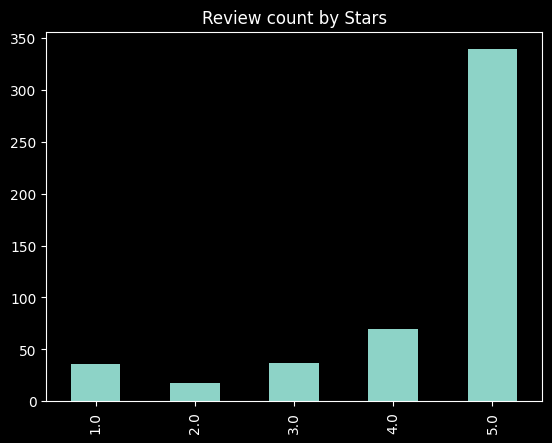

In [24]:
ax = df['Score'].value_counts().sort_index().plot(kind='bar', title='Review count by Stars')
# we know dataset is biased towards 5 star reviews, good we know this early


## NLTK

In [26]:
sample = df['Text'][50] # taking sample 50
print(sample)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


In [38]:
tokens = nltk.word_tokenize(sample)
tokens
#NLTK can tokenize words
#NLP, need to convert text into numbers , so computer can understand

['This',
 'oatmeal',
 'is',
 'not',
 'good',
 '.',
 'Its',
 'mushy',
 ',',
 'soft',
 ',',
 'I',
 'do',
 "n't",
 'like',
 'it',
 '.',
 'Quaker',
 'Oats',
 'is',
 'the',
 'way',
 'to',
 'go',
 '.']

In [39]:
tokens = nltk.word_tokenize(sample)
tokens[:10]
# first 10, so we remember , what we selected here

['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft']

In [40]:
tagged1 = nltk.pos_tag(tokens)
tagged1[:11]
#post tagging , for part of speech tagging
#will run on each of the tokens
# https://www.guru99.com/pos-tagging-chunking-nltk.html

[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ'),
 (',', ',')]

In [41]:
entities = nltk.chunk.ne_chunk(tagged1)
entities.pprint()
    #pretty print
#chunk, group tokens

(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


In [44]:
# they found - Quaker is an Organization -

## Stage-1 Vader Sentiment Score

In [45]:
# VADER (Valence Aware Dictionary and Sentiment Reasoner)
# positive, negative, neural
# adds up for these groups
    # does not account relationship between words
    # just summation


In [50]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
nltk.download('vader_lexicon')
#vader lexicon was missing , giving error

# we can now run this on  text

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [51]:
sia = SentimentIntensityAnalyzer()

In [52]:
sia.polarity_scores('This is an amazing day, wow')
#compound -1 to +1

{'neg': 0.0, 'neu': 0.345, 'pos': 0.655, 'compound': 0.8225}

In [53]:
sia.polarity_scores('This day was not as well as yesterday, at all!')


{'neg': 0.19, 'neu': 0.81, 'pos': 0.0, 'compound': -0.2746}

In [54]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)
        # the score results will be stored in myid? ok


# run this on the entire dataset
# total=len(df)): [ Progress bar ]
# res for [ storing the results ]

  0%|          | 0/500 [00:00<?, ?it/s]

In [55]:

pd.DataFrame(res)
vaders = pd.DataFrame(res).T
 #problem , wrong orientation
    # .T , flip everything horizontally
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
    #reset index and rename index as Id
vaders = vaders.merge(df, how='left')
    #merge it with the original dataframe, will be a Left merge
#res - Results
#but we want it in Dataframe


In [57]:
# we added , sentiment score , + _ - , to df
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1.0,5.0,1.303862e+09,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0.0,1.0,1.346976e+09,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1.0,4.0,1.219018e+09,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3.0,2.0,1.307923e+09,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0.0,5.0,1.350778e+09,Great taffy,Great taffy at a great price. There was a wid...


## VADER Results Visualized

<function matplotlib.pyplot.show(close=None, block=None)>

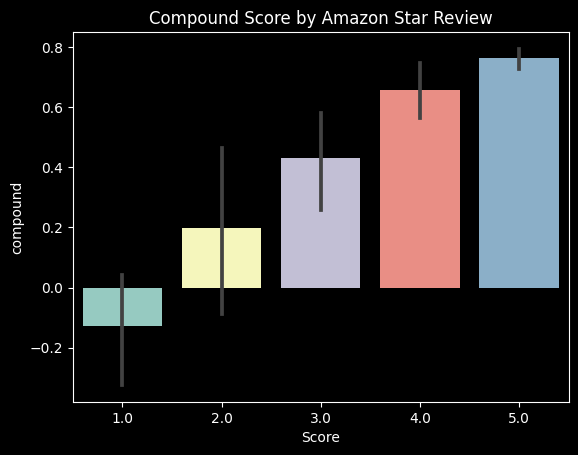

In [58]:
ax = sns.barplot(data=vaders, x='Score', y='compound')
ax.set_title('Compound Score by Amazon Star Review')
plt.show

In [59]:
# more positive the compound , higher the score [ exactly the trend that should be]
#exact trend we want

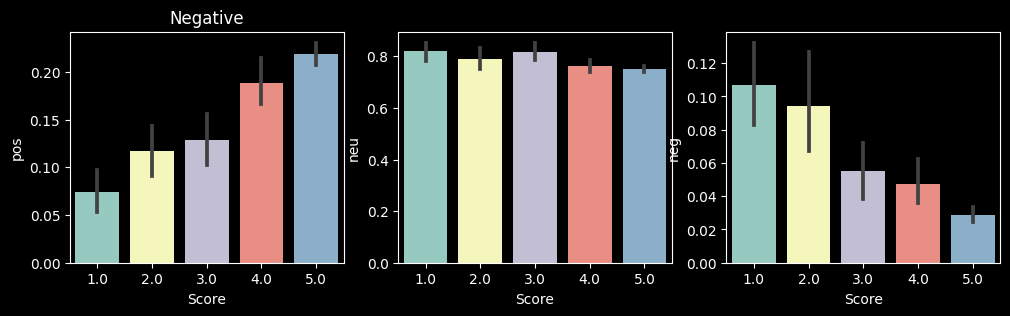

In [60]:
fig, axs = plt.subplots(1,3, figsize=(12, 3))
sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[0].set_title('Neutral')
axs[0].set_title('Negative')
plt.show()



# Stage 3. Roberta Pretrained Model


In [61]:
#transformer model
#previous model included singular words, not relationships or the context inbetween
# Deep learning can pick up in the intentions between the words

In [65]:
pip install transformers


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 31.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 24.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 51.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 46.4 MB/s eta 0:00:00


In [80]:
import transformers
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax
#again


MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)


In [68]:
#we are basically doing transfer learning - weights are already trained
# from twitter


In [69]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [75]:

!pip3 install torch torchaudio torchvision torchtext torchdata

In [77]:
import torch

In [70]:
#VADER
print(sample)
sia.polarity_scores(sample)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [72]:
tokenizer(sample, return_tensors='pt')
#first we tokenize the text
#this is the encoded text 1s and 0s, so the models will understand

{'input_ids': tensor([[    0,   713,  1021, 38615,    16,    45,   205,     4,  3139, 39589,
           219,     6,  3793,     6,    38,   218,    75,   101,    24,     4,
          3232,  4218,   384,  2923,    16,     5,   169,     7,   213,     4,
             2]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1]])}

In [78]:
#Roberta
encoded_text = tokenizer(sample, return_tensors='pt')
output = model(**encoded_text)
output
#the output is a tensor

SequenceClassifierOutput(loss=None, logits=tensor([[ 3.1436, -0.7107, -2.6559]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [83]:
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores
#make to numpy. so we can store locally
# the scores are the, negative, neural and positive

array([0.97635514, 0.02068748, 0.00295737], dtype=float32)

In [87]:
scores_dict = {
    'roberta_neg' :  scores[0],
    'roberta_neu' :  scores[1],
    'roberta_pos' :  scores[2]
}
print(scores_dict)
#roberta shoes its negative , shows how much more powerful this model is


{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687476, 'roberta_pos': 0.002957372}


In [91]:
# run this on the entire dataset
def polarity_scores_roberta(example):
  encoded_text = tokenizer(sample, return_tensors='pt')
  output = model(**encoded_text)
  scores = output[0][0].detach().numpy()
  scores = softmax(scores)
  scores_dict = {
    'roberta_neg' :  scores[0],
    'roberta_neu' :  scores[1],
    'roberta_pos' :  scores[2]
  }
  return scores_dict


In [98]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    vader_result = sia.polarity_scores(text)
    roberta_result = polarity_scores_roberta(text)
    both = {**vader_result, **roberta_result}
    break

  0%|          | 0/500 [00:00<?, ?it/s]

In [94]:
vader_result

{'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.9441}

In [95]:
roberta_result

{'roberta_neg': 0.97635514,
 'roberta_neu': 0.020687476,
 'roberta_pos': 0.002957372}

In [ ]:
#we have both

In [97]:
both = {**vader_result, **roberta_result}
#combine 2 dictionaraies



```
# res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    vader_result = sia.polarity_scores(text)
    vader_results_rename = {}
    for key, value in vader_results.items():
      vader_results_rename[f"vader_{key}"] = value
        #rename vader results
    roberta_result = polarity_scores_roberta(text)
    both = {**vader_result, **roberta_result}
    break
```



In [101]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Text']
        myid = row['Id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/500 [00:00<?, ?it/s]

In [105]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(df, how='left')




In [106]:
results_df.head()
#vader and roberta scores , both there now

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,0.976355,0.020687,0.002957,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1.0,5.0,1.303862e+09,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,0.976355,0.020687,0.002957,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0.0,1.0,1.346976e+09,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,0.976355,0.020687,0.002957,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1.0,4.0,1.219018e+09,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,0.976355,0.020687,0.002957,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3.0,2.0,1.307923e+09,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,0.976355,0.020687,0.002957,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0.0,5.0,1.350778e+09,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
#compare scores

In [107]:
results_df.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'ProductId', 'UserId',
       'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator',
       'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

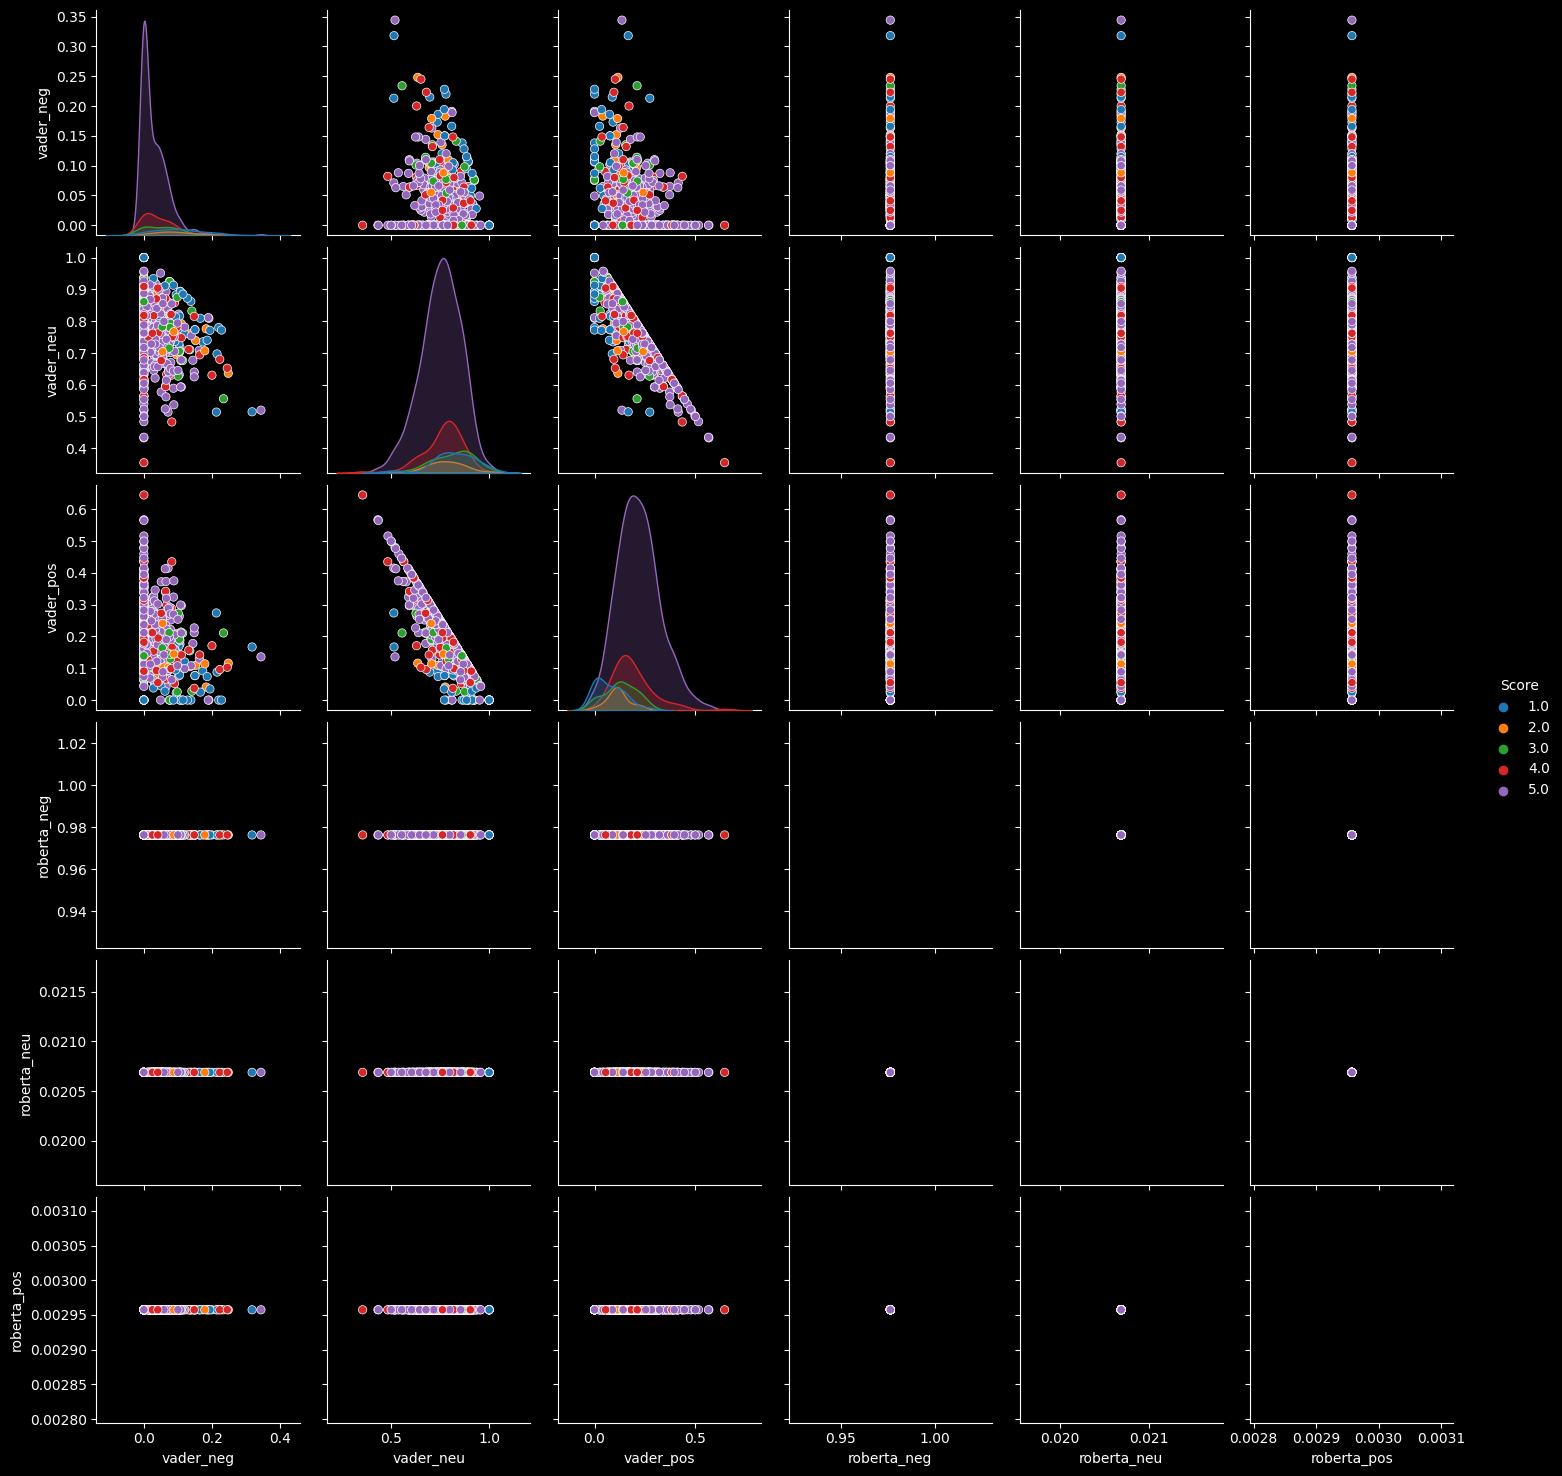

In [108]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='Score',
            palette='tab10')
plt.show()

In [ ]:
# stage 4
# positive 1 star reviews - Negative 5 star reviews
  #where the model , does the opposite , of what it think it should

In [109]:
results_df.query('Score == 1') \
    .sort_values('roberta_pos', ascending=False)['Text'].values[0]
    #model gave it a good rating , but its a 1 star review

'Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".'

In [110]:
results_df.query('Score == 1') \
    .sort_values('vader_pos', ascending=False)['Text'].values[0]
    #same with vader

'So we cancelled the order.  It was cancelled without any problem.  That is a positive note...'

In [111]:
results_df.query('Score == 5') \
    .sort_values('roberta_neg', ascending=False)['Text'].values[0]
    #negative sentiment but 5 star reviews

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [112]:
results_df.query('Score == 5') \
    .sort_values('vader_neg', ascending=False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

Hugging Face Transformers pipeline


In [113]:
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


No CUDA runtime is found, using CUDA_HOME='/usr/local/cuda'
Xformers is not installed correctly. If you want to use memory_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


In [ ]:
# we can run sentiment analysis , with just 2 lines of code


In [114]:
sent_pipeline('That icecream sold very well, but what to do now')

[{'label': 'POSITIVE', 'score': 0.9653313755989075}]

In [115]:
sent_pipeline('Where is the hotel in Nambia')

[{'label': 'NEGATIVE', 'score': 0.8624386787414551}]